### Assessed Task #2

In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import re
import warnings
warnings.filterwarnings('ignore')

**Task1**: Authentication

In [2]:
# Your credentials go here ...

consumer_key = 'TsBOnrwydStaWmvUeShzJ90iS'
consumer_key_secret = 'FkkmXlmwTSjaf8pds7rz3tvOpehRVPpB8lKlWBQzBp4fsDbKY1'
access_token = '2576751307-N7lUuCWkpY7ZcNDJZlRzDB6QAnfEjN9tgWhhA9B'
access_token_secret = 'L6nOSOKuJ2GbSDj8nTfGb5yCQVxGKlZrIFzzdtyacwfkV'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

**Task 1**
Collect 400 tweets from two different Twitter users (Australian politicians), 200 from each.  You should try to find two politicians where you would expect there to be some noticeable differences in their tweets.


#### Julian Hill MP (@JulianHillMP) 


In [3]:
max_tweets = 200
screen_name = '@JulianHillMP'

tweets_JH = api.user_timeline(screen_name = screen_name,
                             tweet_mode = 'extended',
                             count = max_tweets)

In [4]:
list_of_dicts_JH = []
for tweet in tweets_JH:
    list_of_dicts_JH.append(tweet._json)
#print(list_of_dicts_JH)

with open('Files/JulianHillMP_tweet.json', mode = 'w') as file:
    file.write(json.dumps(list_of_dicts_JH , indent = 4))

#### Scott Morrison (@ScottMorrisonMP) 

In [5]:
max_tweets = 200
screen_name = '@ScottMorrisonMP'

tweets_SM = api.user_timeline(screen_name = screen_name,
                           tweet_mode = 'extended',
                           count = max_tweets)

In [6]:
list_of_dicts_SM = []
for tweet in tweets_SM:
    list_of_dicts_SM.append(tweet._json)
#print(list_of_dicts_SM)

with open('Files/ScottMorrisonMP_tweet.json', mode = 'w') as file:
    file.write(json.dumps(list_of_dicts_SM , indent = 4))

In [7]:
#print(list_of_dicts_JH)

In [8]:
#JulianHillMP
list1 = []
with open('Files/JulianHillMP_tweet.json', encoding = 'utf-8', mode = 'r') as file:
        list_of_dicts_JH = json.load(file)
        for dict in list_of_dicts_JH:
             list1.append({'user':str(dict['user']['name']),
                          'full_text':str(dict['full_text']),
                          'posting_time':dict['created_at'],
             })
#print(list[0])

In [9]:
#JulianHillMP
df_JH = pd.DataFrame(list1 , columns = ['user','full_text', 'posting_time'])
df_JH

,user,full_text,posting_time
0,Julian Hill MP,🐨 🐨 🐨,Sun Oct 03 22:49:59 +0000 2021
1,Julian Hill MP,"Cya later, bruz!\n#nswpol",Sun Oct 03 22:42:25 +0000 2021
2,Julian Hill MP,@JulianAndrew63 Tim has one significant advant...,Sun Oct 03 10:08:15 +0000 2021
3,Julian Hill MP,What kind of bloke picks a sporting team based...,Sat Oct 02 22:04:54 +0000 2021
4,Julian Hill MP,RT @MrKRudd: Seems Turnbull &amp; I have upset...,Sat Oct 02 08:13:09 +0000 2021
...,...,...,...
195,Julian Hill MP,Morrison &amp; Berejiklian are negligent &amp;...,Thu Aug 19 09:57:41 +0000 2021
196,Julian Hill MP,RT @USAembassyinOZ: It would be really helpful...,Thu Aug 19 00:33:50 +0000 2021
197,Julian Hill MP,@GrantVisas @NickMcKim @karenandrewsmp @KKenea...,Wed Aug 18 04:31:22 +0000 2021
198,Julian Hill MP,Morrison. Amazing. Reaches new lows every day\...,Wed Aug 18 02:43:59 +0000 2021


In [10]:
df_JH['posting_time'] = pd.to_datetime(df_JH['posting_time'])
df_JH['hour'] = df_JH['posting_time'].dt.hour

__ScottMorrisonMP__

In [11]:
#print(list_of_dicts_SM)

In [12]:
#ScottMorrisonMP
list2 = []
with open('Files/ScottMorrisonMP_tweet.json', encoding = 'utf-8', mode = 'r') as file:
        list_of_dicts_SM = json.load(file)
        for dict in list_of_dicts_SM:
            list2.append({'user':str(dict['user']['name']),
                          'full_text':str(dict['full_text']),
                          'posting_time':dict['created_at'],
             })

In [13]:
#ScottMorrisonMP
df_SM = pd.DataFrame(list2 , columns = ['user','full_text', 'posting_time'])
df_SM

,user,full_text,posting_time
0,Scott Morrison,Australia and India are great friends. Our Com...,Thu Sep 30 07:18:22 +0000 2021
1,Scott Morrison,Great to meet with Australian Indian media tod...,Thu Sep 30 07:18:21 +0000 2021
2,Scott Morrison,Great to meet my good friend Japanese PM @suga...,Sat Sep 25 10:00:31 +0000 2021
3,Scott Morrison,Excellent discussions at our first in-person Q...,Fri Sep 24 22:58:33 +0000 2021
4,Scott Morrison,50% of all Australians aged 16+ are now fully ...,Fri Sep 24 02:13:32 +0000 2021
...,...,...,...
195,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,Mon Feb 01 21:10:35 +0000 2021
196,Scott Morrison,The coming days will be difficult for many Wes...,Sun Jan 31 05:52:40 +0000 2021
197,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,Wed Jan 27 10:09:34 +0000 2021
198,Scott Morrison,🇦🇺🇮🇳 are closer than we have ever been. While ...,Tue Jan 26 06:05:05 +0000 2021


In [14]:
df_SM['posting_time'] = pd.to_datetime(df_SM['posting_time'])
df_SM['hour'] = df_SM['posting_time'].dt.hour

**Merging df_JH and df_SM tables into one df**

In [15]:
df = pd.concat([df_JH,df_SM], axis=0).reset_index()
df

,index,user,full_text,posting_time,hour
0,0,Julian Hill MP,🐨 🐨 🐨,2021-10-03 22:49:59+00:00,22
1,1,Julian Hill MP,"Cya later, bruz!\n#nswpol",2021-10-03 22:42:25+00:00,22
2,2,Julian Hill MP,@JulianAndrew63 Tim has one significant advant...,2021-10-03 10:08:15+00:00,10
3,3,Julian Hill MP,What kind of bloke picks a sporting team based...,2021-10-02 22:04:54+00:00,22
4,4,Julian Hill MP,RT @MrKRudd: Seems Turnbull &amp; I have upset...,2021-10-02 08:13:09+00:00,8
...,...,...,...,...,...
395,195,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21
396,196,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5
397,197,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10
398,198,Scott Morrison,🇦🇺🇮🇳 are closer than we have ever been. While ...,2021-01-26 06:05:05+00:00,6


**Task 2** Use pandas to plot the posting times of the tweets for the two users in one bar chart; the aim of the plot is to distinguish the two users.

Text(0.5, 0, 'Time')

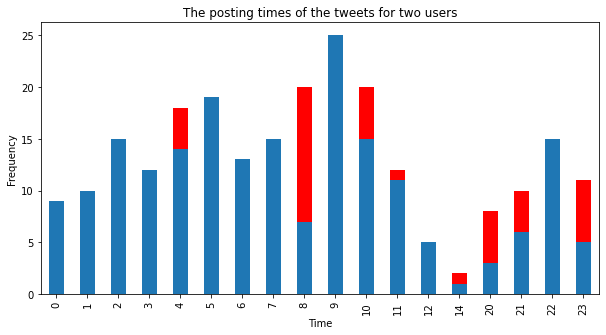

In [50]:
ax1 = df_JH['hour'].value_counts().sort_index().plot.bar(figsize = (10, 5), color = 'red')
ax2 = df_SM['hour'].value_counts().sort_index().plot.bar(figsize = (10, 5))
ax1.set_title('The posting times of the tweets for two users')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Time')

**Task 3** Use pandas to construct one bar chart of the proportions of tweets for each of the two users that contain pictures or links.

In [17]:
df['text_without_links'] = df['full_text'].str.replace('http\S+|www.\S+', '', case = False)
df

,index,user,full_text,posting_time,hour,text_without_links
0,0,Julian Hill MP,🐨 🐨 🐨,2021-10-03 22:49:59+00:00,22,🐨 🐨 🐨
1,1,Julian Hill MP,"Cya later, bruz!\n#nswpol",2021-10-03 22:42:25+00:00,22,"Cya later, bruz!\n#nswpol"
2,2,Julian Hill MP,@JulianAndrew63 Tim has one significant advant...,2021-10-03 10:08:15+00:00,10,@JulianAndrew63 Tim has one significant advant...
3,3,Julian Hill MP,What kind of bloke picks a sporting team based...,2021-10-02 22:04:54+00:00,22,What kind of bloke picks a sporting team based...
4,4,Julian Hill MP,RT @MrKRudd: Seems Turnbull &amp; I have upset...,2021-10-02 08:13:09+00:00,8,RT @MrKRudd: Seems Turnbull &amp; I have upset...
...,...,...,...,...,...,...
395,195,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21,Had a warm discussion with Chancellor Merkel l...
396,196,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5,The coming days will be difficult for many Wes...
397,197,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10,Delighted to meet virtually with Malaysian PM ...
398,198,Scott Morrison,🇦🇺🇮🇳 are closer than we have ever been. While ...,2021-01-26 06:05:05+00:00,6,🇦🇺🇮🇳 are closer than we have ever been. While ...


In [18]:
df['tweet_links'] = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
df

,index,user,full_text,posting_time,hour,text_without_links,tweet_links
0,0,Julian Hill MP,🐨 🐨 🐨,2021-10-03 22:49:59+00:00,22,🐨 🐨 🐨,[]
1,1,Julian Hill MP,"Cya later, bruz!\n#nswpol",2021-10-03 22:42:25+00:00,22,"Cya later, bruz!\n#nswpol",[]
2,2,Julian Hill MP,@JulianAndrew63 Tim has one significant advant...,2021-10-03 10:08:15+00:00,10,@JulianAndrew63 Tim has one significant advant...,[]
3,3,Julian Hill MP,What kind of bloke picks a sporting team based...,2021-10-02 22:04:54+00:00,22,What kind of bloke picks a sporting team based...,[https://t.co/AfVScztCuF]
4,4,Julian Hill MP,RT @MrKRudd: Seems Turnbull &amp; I have upset...,2021-10-02 08:13:09+00:00,8,RT @MrKRudd: Seems Turnbull &amp; I have upset...,[]
...,...,...,...,...,...,...,...
395,195,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21,Had a warm discussion with Chancellor Merkel l...,[]
396,196,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5,The coming days will be difficult for many Wes...,[]
397,197,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10,Delighted to meet virtually with Malaysian PM ...,[https://t.co/efSJnhATBc]
398,198,Scott Morrison,🇦🇺🇮🇳 are closer than we have ever been. While ...,2021-01-26 06:05:05+00:00,6,🇦🇺🇮🇳 are closer than we have ever been. While ...,[https://t.co/53trQwNfP5]


In [19]:
tweet_links = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
tweet_links

0                             []
1                             []
2                             []
3      [https://t.co/AfVScztCuF]
4                             []
                 ...            
395                           []
396                           []
397    [https://t.co/efSJnhATBc]
398    [https://t.co/53trQwNfP5]
399                           []
Name: full_text, Length: 400, dtype: object

In [20]:
df['include_links'] = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x)).apply((lambda x: len(x) != 0))
df = df.reset_index()                                 
df

,level_0,index,user,full_text,posting_time,hour,text_without_links,tweet_links,include_links
0,0,0,Julian Hill MP,🐨 🐨 🐨,2021-10-03 22:49:59+00:00,22,🐨 🐨 🐨,[],False
1,1,1,Julian Hill MP,"Cya later, bruz!\n#nswpol",2021-10-03 22:42:25+00:00,22,"Cya later, bruz!\n#nswpol",[],False
2,2,2,Julian Hill MP,@JulianAndrew63 Tim has one significant advant...,2021-10-03 10:08:15+00:00,10,@JulianAndrew63 Tim has one significant advant...,[],False
3,3,3,Julian Hill MP,What kind of bloke picks a sporting team based...,2021-10-02 22:04:54+00:00,22,What kind of bloke picks a sporting team based...,[https://t.co/AfVScztCuF],True
4,4,4,Julian Hill MP,RT @MrKRudd: Seems Turnbull &amp; I have upset...,2021-10-02 08:13:09+00:00,8,RT @MrKRudd: Seems Turnbull &amp; I have upset...,[],False
...,...,...,...,...,...,...,...,...,...
395,395,195,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21,Had a warm discussion with Chancellor Merkel l...,[],False
396,396,196,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5,The coming days will be difficult for many Wes...,[],False
397,397,197,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10,Delighted to meet virtually with Malaysian PM ...,[https://t.co/efSJnhATBc],True
398,398,198,Scott Morrison,🇦🇺🇮🇳 are closer than we have ever been. While ...,2021-01-26 06:05:05+00:00,6,🇦🇺🇮🇳 are closer than we have ever been. While ...,[https://t.co/53trQwNfP5],True


In [21]:
#Create new df to calculate proportion of tweet including pictures or links
media_prob = df.groupby(['user','include_links']).size().reset_index(name ='count')
media_prob['total'] = media_prob.groupby(['user'])['count'].transform('sum')
media_prob = media_prob.sort_values(by=['total'], ascending=False)
media_prob

,user,include_links,count,total
0,Julian Hill MP,False,95,200
1,Julian Hill MP,True,105,200
2,Scott Morrison,False,88,200
3,Scott Morrison,True,112,200


In [22]:
media_prob['percentage'] = [i / j * 100 for i,j in zip(media_prob['count'], media_prob['total'])]
media_prob

,user,include_links,count,total,percentage
0,Julian Hill MP,False,95,200,47.5
1,Julian Hill MP,True,105,200,52.5
2,Scott Morrison,False,88,200,44.0
3,Scott Morrison,True,112,200,56.0


In [23]:
cols = ['user', 'percentage']
media_prob_true = media_prob[media_prob['include_links'] == True]
media_prob_true = media_prob_true[cols]
media_prob_true

,user,percentage
1,Julian Hill MP,52.5
3,Scott Morrison,56.0


Text(0.5, 0, 'User')

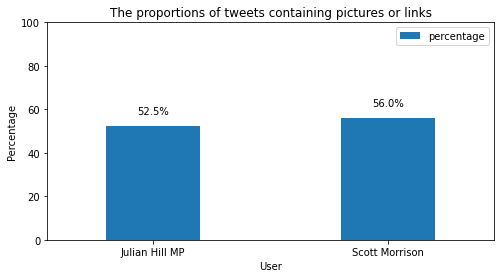

In [48]:
ax = media_prob_true.plot(kind='bar', x='user', y= 'percentage', figsize=(8,4), width=0.4, rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height.round(2)}%', (x + width/2, y + height*1.1), ha='center')
ax.set_ylim(0, 100)
ax.set_title('The proportions of tweets containing pictures or links')
ax.set_ylabel('Percentage')
ax.set_xlabel('User')

**Task 4** Use pandas to construct a histogram of the number of hashtags in tweets for each of the two users.

In [26]:
df['hashtags'] = df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x))
df

,level_0,index,user,full_text,posting_time,hour,text_without_links,tweet_links,include_links,hashtags
0,0,0,Julian Hill MP,🐨 🐨 🐨,2021-10-03 22:49:59+00:00,22,🐨 🐨 🐨,[],False,[]
1,1,1,Julian Hill MP,"Cya later, bruz!\n#nswpol",2021-10-03 22:42:25+00:00,22,"Cya later, bruz!\n#nswpol",[],False,[nswpol]
2,2,2,Julian Hill MP,@JulianAndrew63 Tim has one significant advant...,2021-10-03 10:08:15+00:00,10,@JulianAndrew63 Tim has one significant advant...,[],False,[auspol]
3,3,3,Julian Hill MP,What kind of bloke picks a sporting team based...,2021-10-02 22:04:54+00:00,22,What kind of bloke picks a sporting team based...,[https://t.co/AfVScztCuF],True,[auspol]
4,4,4,Julian Hill MP,RT @MrKRudd: Seems Turnbull &amp; I have upset...,2021-10-02 08:13:09+00:00,8,RT @MrKRudd: Seems Turnbull &amp; I have upset...,[],False,[]
...,...,...,...,...,...,...,...,...,...,...
395,395,195,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21,Had a warm discussion with Chancellor Merkel l...,[],False,[COVID19]
396,396,196,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5,The coming days will be difficult for many Wes...,[],False,[]
397,397,197,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10,Delighted to meet virtually with Malaysian PM ...,[https://t.co/efSJnhATBc],True,[]
398,398,198,Scott Morrison,🇦🇺🇮🇳 are closer than we have ever been. While ...,2021-01-26 06:05:05+00:00,6,🇦🇺🇮🇳 are closer than we have ever been. While ...,[https://t.co/53trQwNfP5],True,"[AustraliaDay, RepublicDay, dosti]"


In [27]:
df

,level_0,index,user,full_text,posting_time,hour,text_without_links,tweet_links,include_links,hashtags
0,0,0,Julian Hill MP,🐨 🐨 🐨,2021-10-03 22:49:59+00:00,22,🐨 🐨 🐨,[],False,[]
1,1,1,Julian Hill MP,"Cya later, bruz!\n#nswpol",2021-10-03 22:42:25+00:00,22,"Cya later, bruz!\n#nswpol",[],False,[nswpol]
2,2,2,Julian Hill MP,@JulianAndrew63 Tim has one significant advant...,2021-10-03 10:08:15+00:00,10,@JulianAndrew63 Tim has one significant advant...,[],False,[auspol]
3,3,3,Julian Hill MP,What kind of bloke picks a sporting team based...,2021-10-02 22:04:54+00:00,22,What kind of bloke picks a sporting team based...,[https://t.co/AfVScztCuF],True,[auspol]
4,4,4,Julian Hill MP,RT @MrKRudd: Seems Turnbull &amp; I have upset...,2021-10-02 08:13:09+00:00,8,RT @MrKRudd: Seems Turnbull &amp; I have upset...,[],False,[]
...,...,...,...,...,...,...,...,...,...,...
395,395,195,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21,Had a warm discussion with Chancellor Merkel l...,[],False,[COVID19]
396,396,196,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5,The coming days will be difficult for many Wes...,[],False,[]
397,397,197,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10,Delighted to meet virtually with Malaysian PM ...,[https://t.co/efSJnhATBc],True,[]
398,398,198,Scott Morrison,🇦🇺🇮🇳 are closer than we have ever been. While ...,2021-01-26 06:05:05+00:00,6,🇦🇺🇮🇳 are closer than we have ever been. While ...,[https://t.co/53trQwNfP5],True,"[AustraliaDay, RepublicDay, dosti]"


In [28]:
df['hashtags'][4]

[]

In [29]:
s = df['full_text'].str.split(expand=True).stack()
counts = s[lambda x: x.str.startswith('#')].value_counts()

In [30]:
counts

#auspol               87
#COVID19              20
#Budget2021            9
#AUKUS                 7
#COVID19Aus            5
                      ..
#melbournelockdown     1
#AustraliaDay          1
#FreeSpeech            1
#lockdown              1
#earthquake            1
Length: 107, dtype: int64

In [31]:
import numpy as np

df2 = pd.Series(np.hstack(df['hashtags'])).value_counts().to_frame('count')
df2 = df2.rename_axis('Hashtag').reset_index()

In [32]:
df2

,Hashtag,count
0,auspol,87
1,COVID19,28
2,Budget2021,13
3,AUKUS,7
4,Afghanistan,5
...,...,...
98,VaccinePassports,1
99,ScottyFromDamageControl,1
100,KeepAusPetFriendly,1
101,integrity,1


In [33]:
df['full_text'].str.extractall(r'(\#\w+)')[0].value_counts()

#auspol               87
#COVID19              28
#Budget2021           13
#AUKUS                 7
#Afghanistan           5
                      ..
#melbournelockdown     1
#AustraliaDay          1
#FreeSpeech            1
#Zoolander             1
#earthquake            1
Name: 0, Length: 103, dtype: int64

In [34]:
df.to_csv('tweet_data.csv')

In [35]:
df['hashtags'][4][1]
#242 []
#158


IndexError: list index out of range

In [ ]:
df['hashtags']

In [ ]:
from collections import Counter
d = Counter(df.hashtags.sum())
df = pd.DataFrame([d]).T
df

In [ ]:
len([item for sublist in df.hashtags for item in sublist])

In [ ]:
sum(map(len, df.hashtags))

In [ ]:
print(map(len, df.hashtags))

In [ ]:
print(df['hashtags'].str.len().sum())

**Task 5** Calculate the log odds ratio (check here for an example) for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users.

In [ ]:
df.dtypes

**Task 6** Use the vaderSentiment module to calculate the sentiment of each tweet, and then for each of the two users, calculate the average 'compound' sentiment for all their tweets.